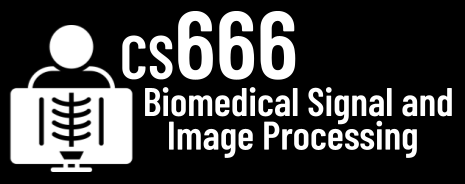
#Assignment 5

In [ ]:
# NAME:

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [5]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
# we are using pydicom, so lets install it!
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [ ]:
# Please download https://cs666.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [ ]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [ ]:
# TODO: 220

In [ ]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

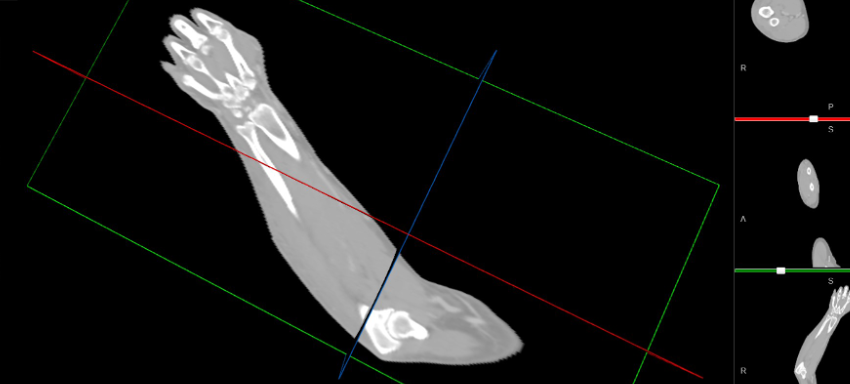

In [ ]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

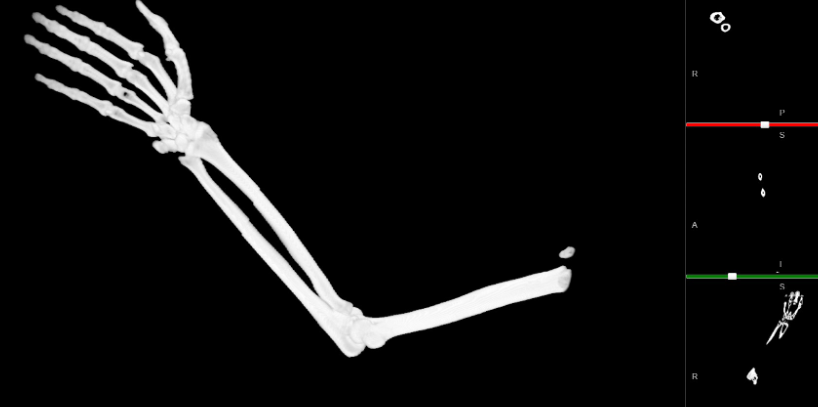

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [8]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [10]:
from pydicom import dcmread

In [14]:
import array
import os

filePath = 'ct'
list = []

for file in sorted(os.listdir(filePath)):
  if file.endswith('.dcm'):
    df = dcmread(os.path.join(filePath, file))
    list.append(df)

array = []

for ds in list:
  array.append(ds.pixel_array)

array = np.array(array)
print(np.shape(array))

(220, 454, 512)


In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

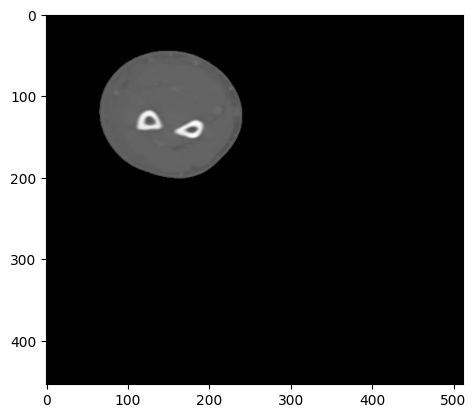

In [17]:
# TODO: YOUR CODE FOR AXIAL
plt.imshow(array[110, :, :], cmap='gray')
plt.show()

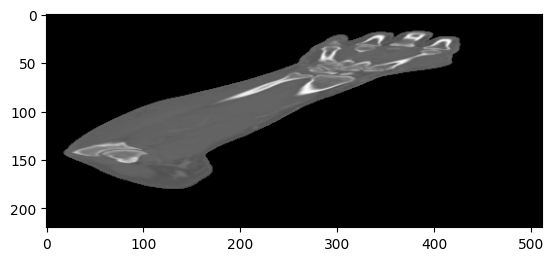

In [19]:
# TODO: YOUR CODE FOR SAGITTAL
plt.imshow(array[:, 110, :], cmap='gray')
plt.show()

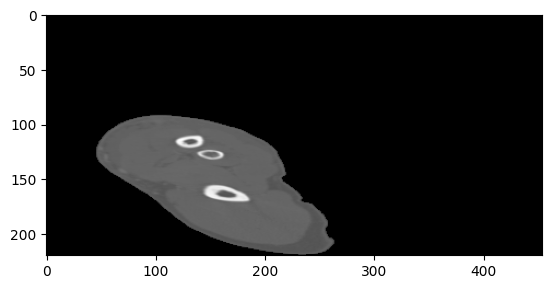

In [20]:
# TODO: YOUR CODE FOR CORONAL
plt.imshow(array[:, :, 110], cmap='gray')
plt.show()

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

410 30 -1024


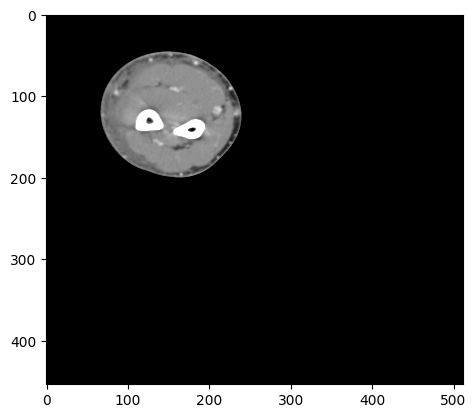

In [22]:
# TODO: YOUR CODE
window_vi = list[0].WindowWidth
level_vi = list[0].WindowCenter
rescale_vi= list[0].RescaleIntercept

print(window_vi, level_vi, rescale_vi)

v_min = level_vi - window_vi/2
v_max = level_vi + window_vi/2
plt.imshow(array[110] + rescale_vi, cmap='gray', vmin=v_min, vmax=v_max)
plt.show()

In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

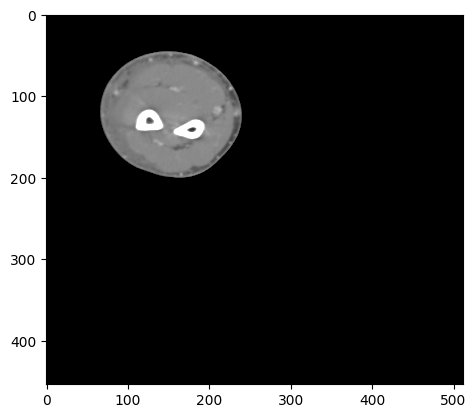

In [23]:
# TODO: YOUR CODE
window = 700
level = 30

vmin = level - window/2
vmax = level + window/2
plt.imshow(array[110] + rescale_vi, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# Which values make sense and why?

In [ ]:
# TODO: YOUR ANSWER
# When I adjust the values vmin and vmax, the image clarity changes. However, by selecting the appropriate window based on the desired outcome, I was able to obtain a clear image for both cases


**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

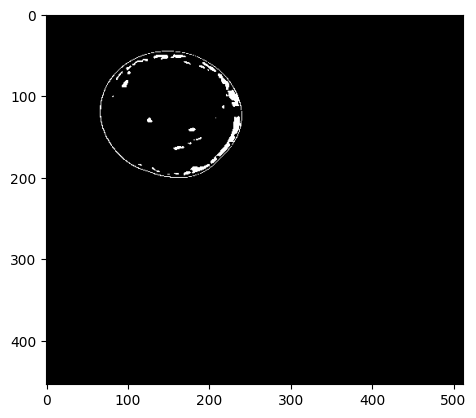

In [24]:
# TODO: YOUR CODE TO SEGMENT FAT
fat_range = (800, 1000)

f_mask = np.logical_and(array >= fat_range[0], array <= fat_range[1])
f_mask = f_mask.astype(np.int16)

plt.imshow(f_mask[110, :, :], cmap='gray')
plt.show()

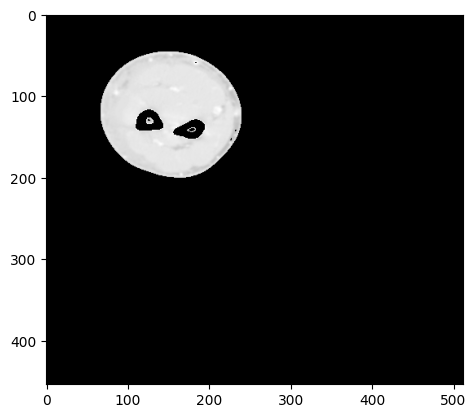

In [25]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE

range = (900, 1200)

mask = np.where(np.logical_and(array >= range[0], array <= range[1]), array, 0)
mask = mask.astype(np.int16)

plt.imshow(mask[110, :, :], cmap='gray')
plt.show()

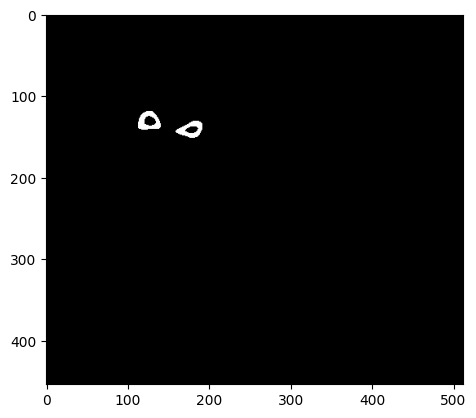

In [26]:
# TODO: YOUR CODE TO SEGMENT BONES

range_of_bone = (1900, 3000)

mask_b = np.logical_and(array >= range_of_bone[0], array <= range_of_bone[1])
mask_b = mask_b.astype(np.int16)

plt.imshow(mask_b[110, :, :], cmap='gray')
plt.show()

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: Yes

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""